# MRC_Trainset

In [28]:
#import packages
import pandas as pd
import numpy as np
import os
import math

# data visualizaion
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Set, Dict, Tuple

# pip install missingno
import missingno as msno
import pprint


# load for MRC datasets
from datasets import load_from_disk

# load for Retrieval dataset
import json


In [29]:
DATA_PATH = "../../data/"

mrc_train_dataset = load_from_disk(os.path.join(DATA_PATH,"train_dataset"))
print(mrc_train_dataset)

# train / validation 분리
# 데이터 구조 중, 필요없는 컬럼인 '__index_level_0__' , 'document_id' 제거

train_dataset = mrc_train_dataset['train'].remove_columns(['__index_level_0__','document_id'])
validation_dataset = mrc_train_dataset['validation'].remove_columns(['__index_level_0__','document_id'])

# Train 데이터 셋 중 train 비율
print(f"*"*20)
print(f"Total Train Dataset Count : {train_dataset.num_rows} ")
print(f"Train Dataset Ratio: { train_dataset.num_rows / (train_dataset.num_rows + validation_dataset.num_rows):.2f} ")


DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})
********************
Total Train Dataset Count : 3952 
Train Dataset Ratio: 0.94 


## 데이터 개요

In [30]:
print(train_dataset[0])
# type(train_dataset)

# arrow_dataset to pandas
train_dataset = pd.DataFrame(train_dataset)
train_dataset.head()

{'title': '미국 상원', 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05', 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?', 'id': 'mrc-1-000067', 'answers': {'answer_start': [2

,title,context,question,id,answers
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}"
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}"
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}"
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}"
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}"


In [31]:
# answers 컬럼 분리
train_dataset = pd.concat([train_dataset.drop(['answers'], axis=1), train_dataset['answers'].apply(pd.Series)], axis=1)

train_dataset['answer_start'] = train_dataset['answer_start'].apply(lambda x: int(''.join(map(str, x))))
train_dataset['text'] = train_dataset['text'].apply(lambda x: ','.join(map(str, x)))

train_dataset.head()

,title,context,question,id,answer_start,text
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,235,하원
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,212,《경영의 실제》
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,510,백성
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,625,중국
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,30,4개


## 결측치 확인

<AxesSubplot:>

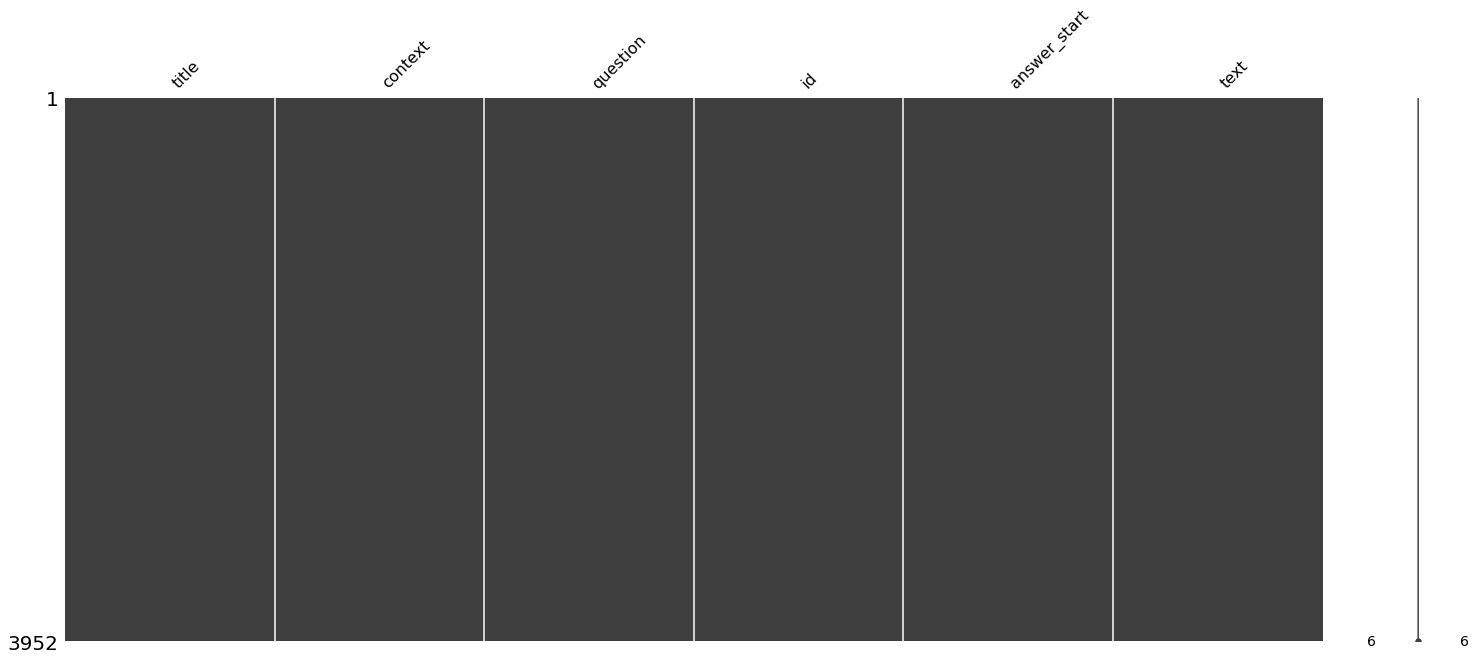

In [32]:
# 결측치 확인
msno.matrix(train_dataset)

데이터에서의 결측치는 없다.

## 데이터 중복 확인

In [33]:
train_dataset.describe(include='all')

,title,context,question,id,answer_start,text
count,3952,3952,3952,3952,3952.000000,3952
unique,2716,3340,3952,3952,NaN,3622
top,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...",펠레폰네소스 전쟁 당시 타사페르네스가 아테네와 동맹을 맺게 한 사람은?,mrc-0-003688,NaN,프랑스
freq,43,4,1,1,NaN,15
mean,NaN,NaN,NaN,NaN,376.794028,NaN
std,NaN,NaN,NaN,NaN,309.122555,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,138.000000,NaN
50%,NaN,NaN,NaN,NaN,310.000000,NaN
75%,NaN,NaN,NaN,NaN,538.000000,NaN


- 중복이 있는 컬럼
    - title
    - context
    - text
- 중복없는 컬럼
    - id
    - question

이 중 title, context, text 부분에의 중복 형태를 알아본다.


In [34]:
def display_groupby_duplicated(dataset : pd.DataFrame , n : int , column_list : List[str]) -> pd.DataFrame:
    '''
    Usage:
        dataset: groupby 대상
        n : groupby에서 n개 이상 중복된 개수를 출력
        column_list : column 이름을 담을 list
    '''
    duplicate_results = pd.concat(g for _, g in dataset.groupby(column_list) if len(g) >= n).sort_values(column_list)
    column_name = ",".join(column_list)
    #print(type(column_name))
    print(f"{column_name} group by count : {len(duplicate_results.index)}")
    
    return duplicate_results
    

### title

In [35]:
# title 
duplicate_results = display_groupby_duplicated(train_dataset, 2, ["title"])
display(duplicate_results.head())

title group by count : 1944


,title,context,question,id,answer_start,text
978,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,미국으로 이민 온 사람들은 누구로부터 돈을 차용할 수 있었나?,mrc-0-002627,271,중개인
2604,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,남성 노동자들은 누가 중국 남성들의 미국 이민을 거부하길 바랐는가?,mrc-0-004520,790,의회 의원
949,1952년 이집트 혁명,1953년 6월 나기브는 공화정을 선포하여 군주제와 귀족 제도를 폐지하였고 이집트 ...,나기브에게 가택연금 처분을 내린 자는?,mrc-0-002735,388,나세르
2352,1952년 이집트 혁명,1882년 영국군은 앵글로-이집트 전쟁을 통하여 이집트 정치에 개입하기 시작하였다....,1949년에 결성된 비밀조직의 표면상 리더는 누구인가?,mrc-0-004068,1114,무하마드 나기브
2865,1952년 이집트 혁명,한편 수에즈 운하에 주둔하고 있던 영국군은 해당 지역의 반영 봉기를 진압할 준비를 ...,봉기군과 함께 영국군의 협상가를 살인한 경찰의 소속 지역은?,mrc-0-000841,127,페다인


### context

In [36]:
# context
duplicate_results = display_groupby_duplicated(train_dataset, 2, ["context"])
display(duplicate_results.head())

context group by count : 1191


,title,context,question,id,answer_start,text
2164,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",ABC에서 방영되는 '시간이동'의 장르는?,mrc-0-004810,21,텔레비전 드라마
2181,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",시간이동' 에피소드의 다음 에피소드의 제목은 무엇인가?,mrc-1-000565,234,거짓말
1350,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,에리오르에게는 효력이 없는 마법은?,mrc-0-005385,120,달 속성의 마법
3408,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,사쿠라가 성장할 때 스피넬 선을 만든 이유는?,mrc-0-005352,356,자신에게서 크로우 리드를 찾지 않게 하려고
1708,하인리히 4세,1090년 교황 우르바노 2세의 주선으로 43세의 토스카나 여후작 마틸다가 결혼을 ...,교황 우르바노 2세가 그레고리오 7세를 원조했을 당시 그의 직책은?,mrc-0-003247,517,추기경


### text

In [37]:
# text
duplicate_results = display_groupby_duplicated(train_dataset, 2, ["text"])
display(duplicate_results.head())

text group by count : 542


,title,context,question,id,answer_start,text
534,팔라 제국,데바팔라 사후 팔라 제국은 점차 힘을 잃기 시작하였다. 데바팔라의 조카였던 비그라하...,라지야팔라의 통솔 기간은?,mrc-0-001011,209,12년
806,하워드 마셜,그는 구두로는 안나 니콜 스미스에게 자신의 재산의 반을 주겠다고 약속했다 하나 유언...,하워드 마셜의 재산 상속을 위해 안나 니콜 스미스가 법정 소송을 벌인 기간은?,mrc-0-002386,108,12년
3181,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,우르바노 5세가 이태리 전역에 십자군 원정을 명령한 해는?,mrc-1-001750,131,1362년
3831,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,우르바노 5세가 십자군동원을 명령한 연도는?,mrc-1-001198,131,1362년
61,서양 근세의 교육,서양 근세의 교육은 14세기에서 17세기 초반 까지의 유럽 세계의 교육활동을 의미한...,신 중심에서 인간 중심 사회로의 변화가 시작된 시기는?,mrc-1-000812,11,14세기


### context & text

In [38]:
# context, text
duplicate_results = display_groupby_duplicated(train_dataset, 2, ["context", "text"])
display(duplicate_results.head())

context,text group by count : 67


,title,context,question,id,answer_start,text
322,문정왕후 (조선),1544년 중종이 병사하였다. 그러나 보위를 재빨리 인종이 접수함으로써 경원대군 추...,문정왕후 윤씨의 아들이었던 인물은 누구인가?,mrc-0-002431,134,경원대군
1727,문정왕후 (조선),1544년 중종이 병사하였다. 그러나 보위를 재빨리 인종이 접수함으로써 경원대군 추...,인종의 대처가 늦었다면 왕이 될 뻔한 인물은?,mrc-1-001617,40,경원대군
457,모부투 세세 세코,"1956년 모부투는 ""de Banzy""의 필명 아래 신문 기사들을 쓰기 시작하였다....",모투부가 참여한 원탁 회의는 어디에서 열렸나요?,mrc-0-000820,753,브뤼셀
2505,모부투 세세 세코,"1956년 모부투는 ""de Banzy""의 필명 아래 신문 기사들을 쓰기 시작하였다....",모투부가 1959년에 다시 방문한 곳은?,mrc-0-001731,427,브뤼셀
2693,리비아 과도국가평의회,"2011년 4월 21일, 과도위는 처음으로 국제사회에 지상군 지원을 공식 요청했다....",과도위가 유엔의 승인 없이 외국군의 파병지원을 요청할 수 있게 된 날은?,mrc-0-000697,193,2011년 7월 15일


context, text가 동일하지만, answer_start가 다름을 확인할 수 있다.

### context, text, answer_start

In [39]:
# context, text, answer_start
duplicate_results = display_groupby_duplicated(train_dataset, 2, ["context", "text", "answer_start"])
display(duplicate_results.head())

context,text,answer_start group by count : 46


,title,context,question,id,answer_start,text
2001,2015년 네팔 봉쇄 사태,2015년 9월 20일에는 계속 정체중이였던 네팔의 헌법 수립안이 네팔 의회에서 9...,네팔 의회 의원 중에서 투표를 포기하고 데모를 시작했던 인원은?,mrc-1-000868,82,66명
3205,2015년 네팔 봉쇄 사태,2015년 9월 20일에는 계속 정체중이였던 네팔의 헌법 수립안이 네팔 의회에서 9...,네팔의 헌법 수립안 투표에서 기권한 사람의 수는?,mrc-0-002753,82,66명
446,통도사,2018년 1월 4일 경상남도의 기념물 제289호로 지정되었다. \n\n통도사는 신...,통도사는 신라시대의 누구에 의하여 설립되었나요?,mrc-0-002131,62,자장율사
1686,통도사,2018년 1월 4일 경상남도의 기념물 제289호로 지정되었다. \n\n통도사는 신...,경상남도 기념물 제289호를 창건한 인물은?,mrc-0-001806,62,자장율사
458,강희제,강희제는 강건성세 3대에 걸쳐 문자의 옥을 시작시켜서 한족 학자들을 대거 숙청함으로...,강희제가 자식을 여러 명 낳는 데 영향을 준 자는?,mrc-0-001965,86,부황 순치제


question을 제외한 title, context, text가 존재함을 보여준다.

### conclusion

question은 모두 Unique한 값을 가지고 있다.  
context와 text가 동일하지만 다른 answer_start를 가지고 있거나,
context와 text 그리고 answer_start가 동일한 경우도 있다.
분석을 통해, question을 변형시키는 방식으로 데이터를 증강시키는 방법을 시도한 흔적이 보여진다.

이번 대회도 외부 데이터 사용이 금지되어 있다.  
따라서 데이터 증강을 시도하게 된다면 context를 고정한 상태에서,  
1. question을 변경하지만, text 및 answer_start 는 동일
    - https://github.com/codertimo/KorQuAD-Question-Generation
2. question, answer_start를 변경하지만, text는 동일한 경우도 가능할 수 있다.
3. question, text , answer_start를 다른 문장으로 변경  


이렇게 3가지 방식을 시도해 볼 수 있을 것 같다.

## train_dataset : 컬럼 별 길이

### context

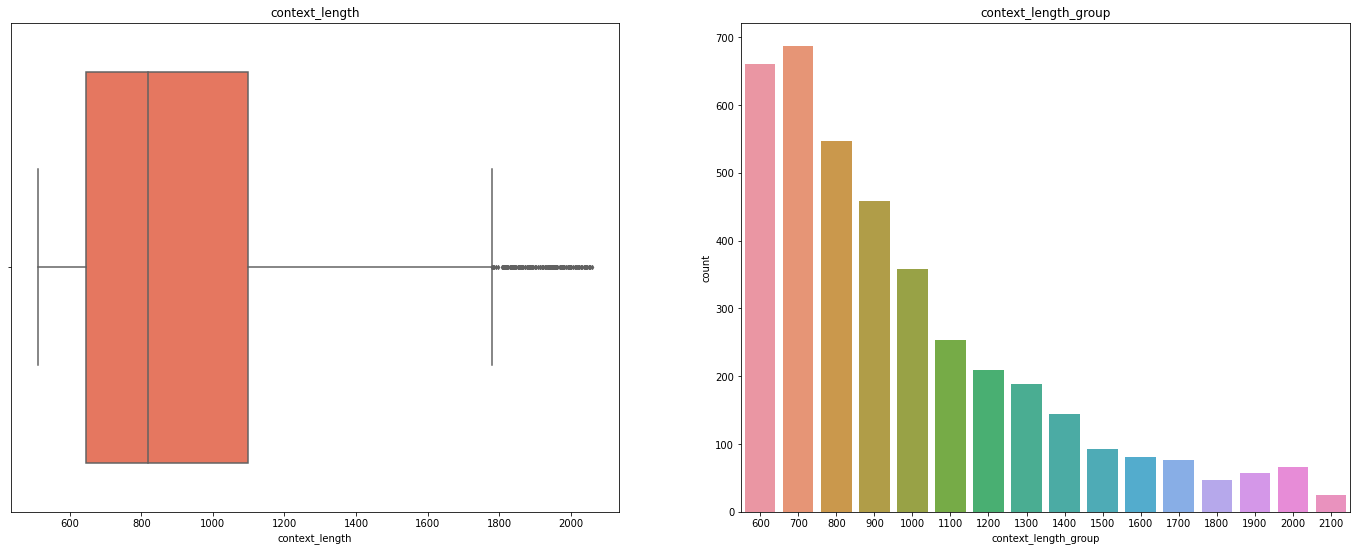

count    3952.000000
mean      920.220648
std       356.500514
min       512.000000
25%       645.000000
50%       819.000000
75%      1099.250000
max      2059.000000
Name: context_length, dtype: float64

******************************
max context : 2059


,title,context,question,id,answer_start,text,context_length,context_length_group
1022,이홍하,그는 전라남도 고흥군에 태어나 조선대학교 생물학과를 졸업하고 순천고등학교와 광주고등...,서복영의 남편이 태어난 도시는?,mrc-0-002580,3,전라남도 고흥군,2059,2100


In [41]:
# context
train_dataset['context_length'] = train_dataset['context'].map(str).apply(len)

min = train_dataset['context_length'].min()

min = round(min,(-1)*(len(str(min))-1))
interval = pow(10,(len(str(min)) - 1))

train_dataset['context_length_group'] = train_dataset['context'].map(lambda x : min + ((len(x)-min)//interval * interval) + interval )


fig, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(x = 'context_length', 
            data = train_dataset, 
            palette = "Reds", 
            ax = axes[0],
            fliersize = 3
           )

axes[0].set_title('context_length')

sns.countplot(x = 'context_length_group', 
              data = train_dataset,
              order = sorted(train_dataset['context_length_group'].unique()),
              # palette = "Blues",
              ax = axes[1],
           )

axes[1].set_title('context_length_group')
plt.show()

display(train_dataset['context_length'].describe(include='all'))

print(f"*"*30)
print(f"max context : {train_dataset['context_length'].max()}")

display(train_dataset[train_dataset['context_length']==train_dataset['context_length'].max()])

context 중 가장 긴 문자의 경우 2059이며, 평균 대비 2배 이상 차이가 남을 보여준다

### title

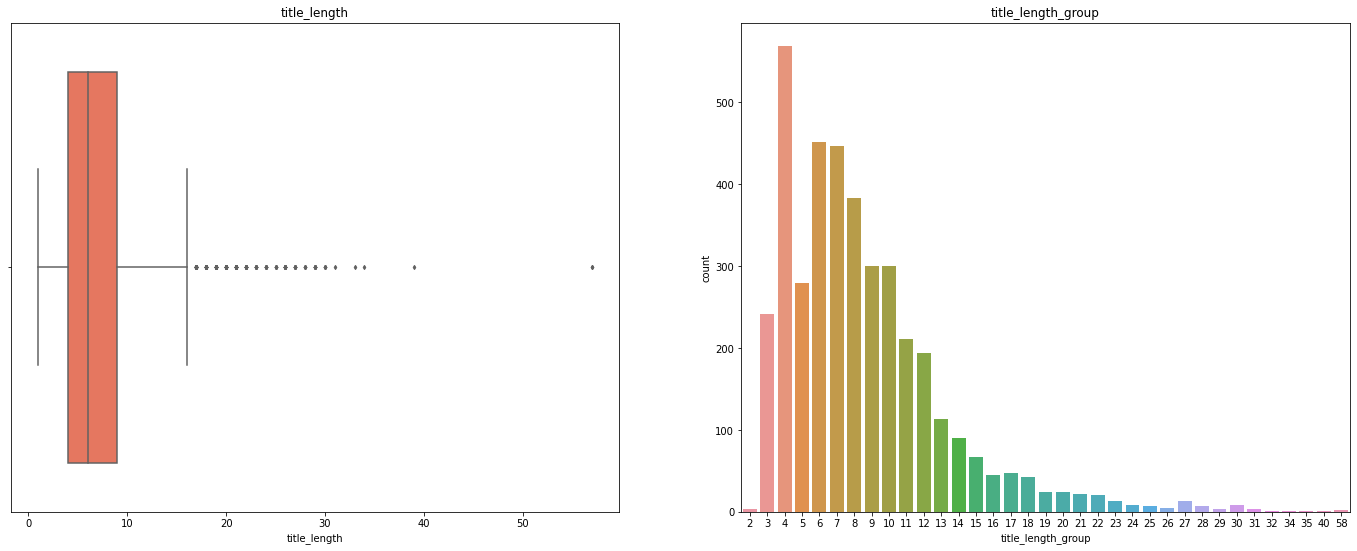

count    3952.000000
mean        7.511387
std         4.823314
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        57.000000
Name: title_length, dtype: float64

******************************
max title : 57


,title,context,question,id,answer_start,text,context_length,context_length_group,title_length,title_length_group,question_length,question_length_group,text_length,text_length_group,answer_start_group
732,박근혜 정부의 최순실 등 민간인에 의한 국정농단 의혹 사건 규명을 위한 특별검사의 ...,워터게이트 당시 미국 공화당 리처드 닉슨 대통령이 자신의 범죄증거가 되는 녹음테이프...,워터게이트 당시 특별검사를 면직시킨 인물은 어떤 결과를 맞이하였나?,mrc-1-001297,94,하야,720,800,57,58,37,38,2,3,100
3398,박근혜 정부의 최순실 등 민간인에 의한 국정농단 의혹 사건 규명을 위한 특별검사의 ...,워터게이트 당시 미국 공화당 리처드 닉슨 대통령이 자신의 범죄증거가 되는 녹음테이프...,지미 카더는 선거 공약으로 무엇을 내세웠는가?,mrc-0-000598,168,신분보장 조항의 입법,720,800,57,58,25,26,11,12,200


In [46]:
# title
train_dataset['title_length'] = train_dataset['title'].map(str).apply(len)

min = 5 # train_dataset['title_length'].min()

min = round(min,(-1)*(len(str(min))-1))
interval = pow(10,(len(str(min)) - 1))

train_dataset['title_length_group'] = train_dataset['title'].map(lambda x : min + ((len(x)-min)//interval * interval) + interval )


fig, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(x = 'title_length', 
            data = train_dataset, 
            palette = "Reds", 
            ax = axes[0],
            fliersize = 3
           )

axes[0].set_title('title_length')

sns.countplot(x = 'title_length_group', 
              data = train_dataset,
              order = sorted(train_dataset['title_length_group'].unique()),
              # palette = "Blues",
              ax = axes[1],
           )

axes[1].set_title('title_length_group')
plt.show()

display(train_dataset['title_length'].describe(include='all'))
print(f"*"*30)

print(f"max title : {train_dataset['title_length'].max()}")
display(train_dataset[train_dataset['title_length']==train_dataset['title_length'].max()])

title의 경우, 최대값과 평균값 사이의 차이가 8배 이상 차이남을 확인

### question

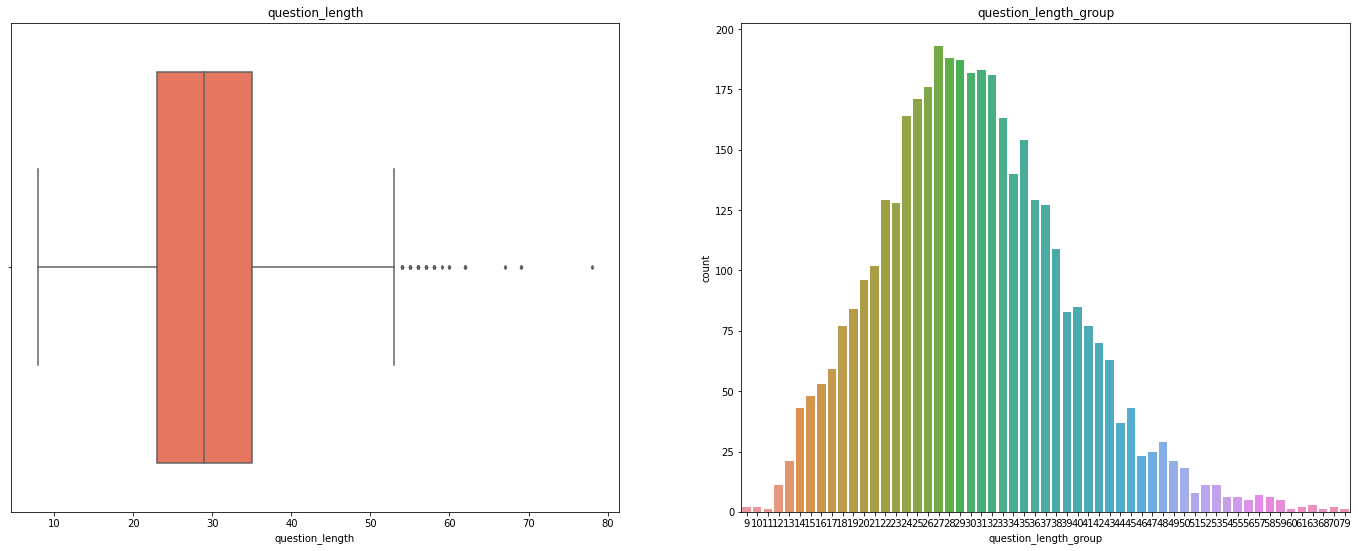

count    3952.000000
mean       29.322368
std         8.727421
min         8.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        78.000000
Name: question_length, dtype: float64

******************************
max question : 78


,title,context,question,id,answer_start,text,context_length,context_length_group,title_length,title_length_group,question_length,question_length_group
1840,면접교섭권,면접교섭권은 1990년 민법 개정으로 신설된 제837조의2에 따라 1991년 1월 ...,사전처분에도 불구하고 양육 부모가 비양육 부모에게 아이를 보여주지 않을 때 위반 행...,mrc-0-004369,1161,이행명령,2036,2100,5,6,78,79


In [43]:
# question
train_dataset['question_length'] = train_dataset['question'].map(str).apply(len)

min = 8 #train_dataset['question_length'].min()

min = round(min,(-1)*(len(str(min))-1))
interval = pow(10,(len(str(min)) - 1))

train_dataset['question_length_group'] = train_dataset['question'].map(lambda x : min + ((len(x)-min)//interval * interval) + interval )


fig, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(x = 'question_length', 
            data = train_dataset, 
            palette = "Reds", 
            ax = axes[0],
            fliersize = 3
           )

axes[0].set_title('question_length')

sns.countplot(x = 'question_length_group', 
              data = train_dataset,
              order = sorted(train_dataset['question_length_group'].unique()),
              # palette = "Blues",
              ax = axes[1],
           )

axes[1].set_title('question_length_group')
plt.show()

display(train_dataset['question_length'].describe(include='all'))
print(f"*"*30)
print(f"max question : {train_dataset['question_length'].max()}")
train_dataset[train_dataset['question_length']==train_dataset['question_length'].max()]

### text

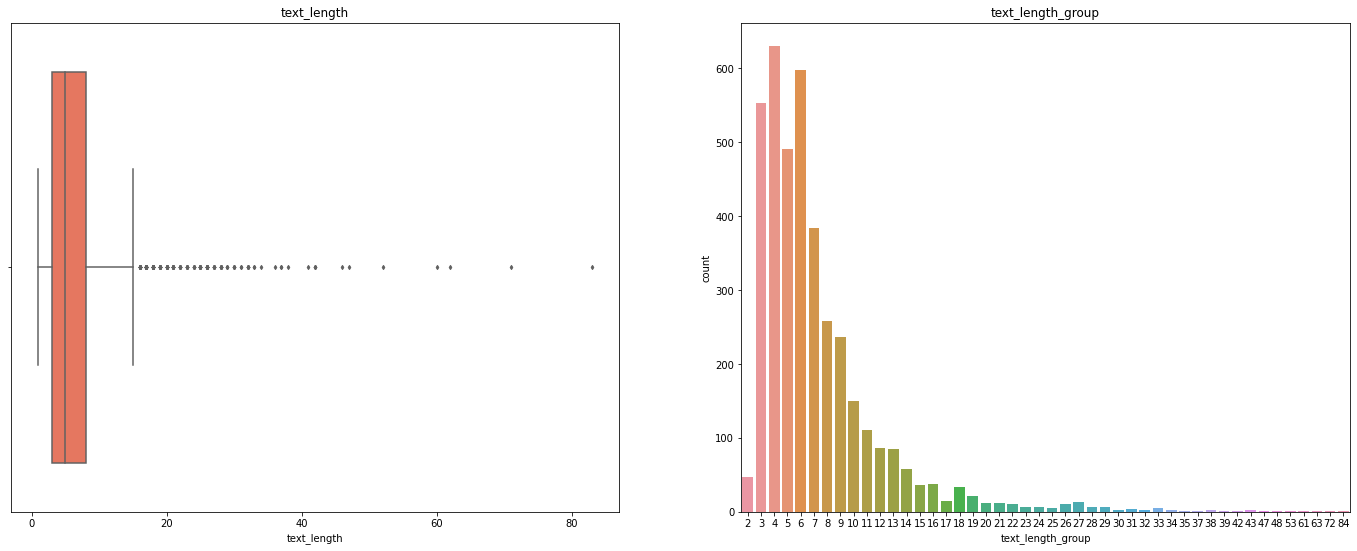

count    3952.000000
mean        6.275051
std         5.346842
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        83.000000
Name: text_length, dtype: float64

******************************
max text_length : 83


,title,context,question,id,answer_start,text,context_length,context_length_group,title_length,title_length_group,question_length,question_length_group,text_length,text_length_group
996,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,mrc-0-002792,1122,“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통...,1633,1700,3,4,36,37,83,84


In [44]:
# text
train_dataset['text_length'] = train_dataset['text'].map(str).apply(len)

min = 5 # train_dataset['text_length'].min()

min = round(min,(-1)*(len(str(min))-1))
interval = pow(10,(len(str(min)) - 1))

train_dataset['text_length_group'] = train_dataset['text'].map(lambda x : min + ((len(x)-min)//interval * interval) + interval )


fig, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(x = 'text_length', 
            data = train_dataset, 
            palette = "Reds", 
            ax = axes[0],
            fliersize = 3
           )

axes[0].set_title('text_length')

sns.countplot(x = 'text_length_group', 
              data = train_dataset,
              order = sorted(train_dataset['text_length_group'].unique()),
              # palette = "Blues",
              ax = axes[1],
           )

axes[1].set_title('text_length_group')
plt.show()

display(train_dataset['text_length'].describe(include='all'))
print(f"*"*30)
print(f"max text_length : {train_dataset['text_length'].max()}")
train_dataset[train_dataset['text_length']==train_dataset['text_length'].max()]


### answer_start

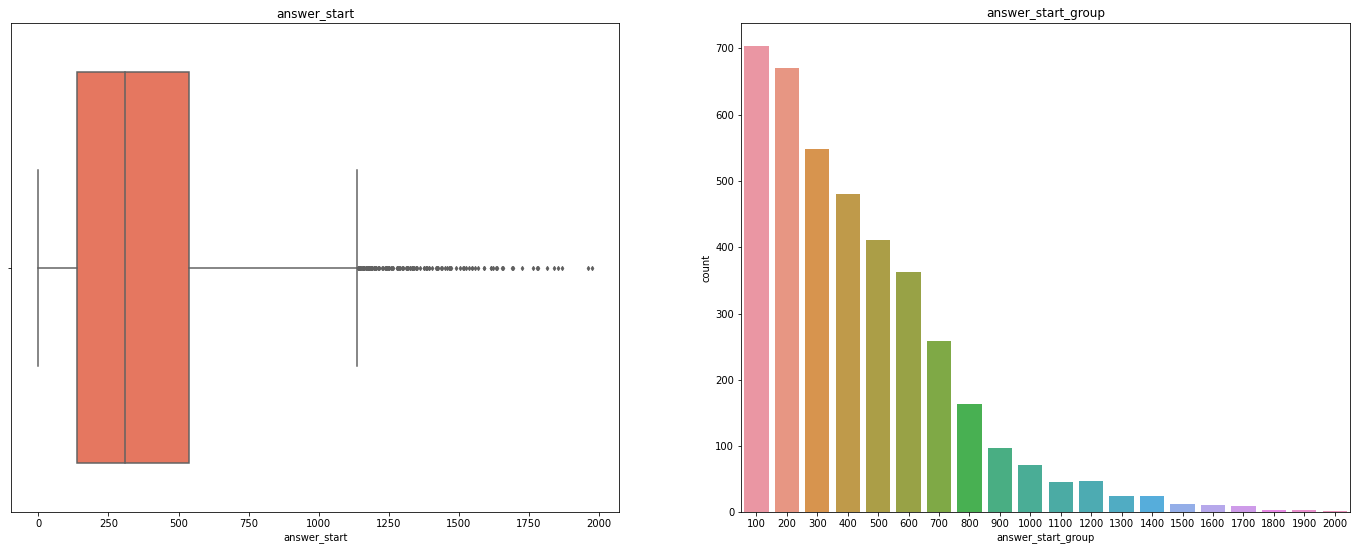

count    3952.000000
mean      376.794028
std       309.122555
min         0.000000
25%       138.000000
50%       310.000000
75%       538.000000
max      1974.000000
Name: answer_start, dtype: float64

******************************
max answer_start_length : 1974
{1844: '제국대학령에 의하면 제국대학에 입학할 자는 구제고등학교 졸업자로 한정되었다. 당시 일본에는 8개의 구제고등학교가 있었으며, '
       '고등학교 입학자 대부분은 일본내 제국대학들에 진학할 수 있었다. 반면에 조선에서 제국대학이 설립될 때는 고등학교를 설립하는 '
       '선단계를 거치지 않았기 때문에 이를 대신할 2년제 예과(豫科)가 설치된 것이다.\\n\\n예과는 고등학교와는 다른 구조를 갖고 '
       '있었다. 고등학교에서 제국대학 학부에 입학할 때는 선발고사를 거쳐서 입학한 반면, 예과에서 본과(학부)로 진학할 때는 별도의 '
       '시험을 거치지 않았다. 또, 고등학교가 3년제 였던 반면 예과는 2년제였다. 고등학교와 대학예과의 이러한 차이는 경성제국대학 '
       '설립 준비 당시부터 기획된 것이었으며, 이는 일본의 제국대학보다 조선의 제국대학을 한단계 낮게 설정한 것과 같은 의미였다. '
       '실제로 일본 홋카이도제국대학의 예과는 설치 당시부터 3년제였지만, 경성제국대학과 다이호쿠 제국대학은 2년제로 '
       '설치되었다.\\n\\n한편, 2년제 예과에서 3년 과정을 속성으로 지도해야 했기 때문에 학생과 교원들에게 학업과중이 심했으며, '
       '예과와 고등학교의 연한 불일치에 대한 논란이 끊이지 않았다. 실제로, 경성제국대학에 진학한 일본인들은 대학예과가 고등학교보다 '
       '1년의 수업연한이 짧다는 이유로 수치심과 열등감을 느끼기도 하였다 . 결국 1934년에 가서야 일본의 대학예과와 식민지 지역의 '
       '대학예과의 수학연한이 동일해졌다.\\n\\n예과는 문과와 이과를 분리하여 모집하였다. 이과 수료자는 전원 의학부로 진학한 '
       '반면, 문과의 경우는 학생선발에서부터 법학계와 문학계로 나누어 학생을 선발했다. 그러나 문학계 학생들 조차 법

,title,context,question,id,answer_start,text,context_length,context_length_group,title_length,title_length_group,question_length,question_length_group,text_length,text_length_group,answer_start_group
1844,경성제국대학,제국대학령에 의하면 제국대학에 입학할 자는 구제고등학교 졸업자로 한정되었다. 당시 ...,경성제국대학에 1년동안 내는 비용이 이공학부 개설 이후 얼마로 변경되었나?,mrc-0-004172,1974,100만원 선,1993,2000,6,7,41,42,7,8,2000


In [45]:
# answer_start
train_dataset['answer_start'] = train_dataset['answer_start'].map(int)

min = 100 # train_dataset['answer_start'].mean()

min = round(min,(-1)*(len(str(min))-1))

interval = pow(10,(len(str(min)) - 1))

train_dataset['answer_start_group'] = train_dataset['answer_start'].map(lambda x : min + (x//interval * 100) )

train_dataset['answer_start'] = train_dataset['answer_start'].map(int)

fig, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(x = 'answer_start', 
            data = train_dataset, 
            palette = "Reds", 
            ax = axes[0],
            fliersize = 3
           )

axes[0].set_title('answer_start')

sns.countplot(x = 'answer_start_group', 
              data = train_dataset,
              order = sorted(train_dataset['answer_start_group'].unique()),
              # palette = "Blues",
              ax = axes[1],
           )

axes[1].set_title('answer_start_group')
plt.show()
display(train_dataset['answer_start'].describe(include='all'))
print(f"*"*30)
print(f"max answer_start_length : {train_dataset['answer_start'].max()}")
pprint.pprint(train_dataset[train_dataset['answer_start']==train_dataset['answer_start'].max()].to_dict()['context'])
display(train_dataset[train_dataset['answer_start']==train_dataset['answer_start'].max()])
